In [3]:
# importare tutte le librerie necessarie
import pandas as pd
import numpy as np
import datetime as dt
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

path = r".\\DataSet\\"

In [4]:
allMadrid = pd.read_csv(path+"out.csv")
allMadrid.head()

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2008-06-01 01:00:00,NaN,0.47,NaN,NaN,11.820078,83.089996,16.990000,16.889999,10.4,8.98,NaN,NaN,28079001
1,2008-06-01 01:00:00,NaN,0.59,NaN,NaN,11.820078,94.820000,17.469999,19.040001,NaN,5.85,NaN,NaN,28079003
2,2008-06-01 01:00:00,NaN,0.55,NaN,NaN,11.820078,75.919998,13.470000,20.270000,NaN,6.95,NaN,NaN,28079004
3,2008-06-01 01:00:00,NaN,0.36,NaN,NaN,11.820078,61.029999,23.110001,10.850000,NaN,5.96,NaN,NaN,28079039
4,2008-06-01 01:00:00,1.68,0.80,1.7,0.3,11.820078,105.199997,12.120000,37.160000,21.9,10.92,1.53,6.67,28079006


In [5]:
#cerco i campi NaN in PM10 e li sostituisco con la media dei valori noti
#trovo il valor medio
for col in allMadrid.columns:
    if allMadrid[col].dtype != object:
        allMadrid[col]=allMadrid[col].fillna(allMadrid[col].mean())

print(allMadrid['PM10'])

0          16.889999
1          19.040001
2          20.270000
3          10.850000
4          37.160000
             ...    
2190883    35.000000
2190884    29.000000
2190885    22.165019
2190886    22.165019
2190887    26.000000
Name: PM10, Length: 2190888, dtype: float64


In [6]:
# Faccio un cambio di formato sul campo data passando da stringa a data
allMadrid['date'] = pd.to_datetime(allMadrid['date'], format='%Y/%m/%d %H:%M:%S')
#prendo la data solo in formato AAAA-MM-GG
allMadrid['date'] = pd.to_datetime(allMadrid['date'].dt.strftime('%Y-%m-%d'))
print(allMadrid['date'])


0         2008-06-01
1         2008-06-01
2         2008-06-01
3         2008-06-01
4         2008-06-01
             ...    
2190883   2018-02-01
2190884   2018-02-01
2190885   2018-02-01
2190886   2018-02-01
2190887   2018-02-01
Name: date, Length: 2190888, dtype: datetime64[ns]


In [7]:
#raggruppo per station
allMadrid = allMadrid.groupby(['station','date']).sum()
print(allMadrid)

                           BEN     CO        EBE      NMHC          NO  \
station  date                                                            
28079001 2008-01-01  17.133685  17.57  18.802235  4.489307  271.861790   
         2008-01-02  17.878628  14.35  19.619723  4.684494  283.681868   
         2008-01-03  17.878628  11.63  19.619723  4.684494  283.681868   
         2008-01-04  17.878628  14.22  19.619723  4.684494  283.681868   
         2008-01-05  17.878628  10.67  19.619723  4.684494  283.681868   
...                        ...    ...        ...       ...         ...   
28079099 2010-12-28  41.650000  17.04  35.010000  6.590000  283.681868   
         2010-12-29  42.280000  17.77  40.090000  6.070000  283.681868   
         2010-12-30  33.290000  14.75  28.540000  5.530000  283.681868   
         2010-12-31  23.240000  10.53  17.820000  4.720000  283.681868   
         2011-01-01   1.110000   0.48   0.860000  0.230000   11.820078   

                            NO_2     

CLASSIFICAZIONE

In [8]:
condition_list = [(allMadrid['PM10'] <= 50), (allMadrid['PM10'] > 50)]

choicelist = [0,1] 

allMadrid['Livello'] = np.select(condition_list, choicelist, default='Non Specificato')

allMadrid['Livello'].value_counts() 

1    91280
0       94
Name: Livello, dtype: int64

In [9]:
allMadrid.head()

BEN     CO        EBE      NMHC          NO  \
station  date                                                            
28079001 2008-01-01  17.133685  17.57  18.802235  4.489307  271.861790   
         2008-01-02  17.878628  14.35  19.619723  4.684494  283.681868   
         2008-01-03  17.878628  11.63  19.619723  4.684494  283.681868   
         2008-01-04  17.878628  14.22  19.619723  4.684494  283.681868   
         2008-01-05  17.878628  10.67  19.619723  4.684494  283.681868   

                            NO_2         O_3         PM10        PM25  \
station  date                                                           
28079001 2008-01-01  2243.720001  158.700000  1061.300003  779.859999   
         2008-01-02  2072.130005  194.629999   699.550000  524.390003   
         2008-01-03  2037.900017  368.220000   414.689998  283.869997   
         2008-01-04  1999.250008  317.660000   733.465013  440.922586   
         2008-01-05  1564.790009  316.050001   659.420000  457.420000   

                           SO_2        TCH        TOL Livello  
station  date                                                  
28079001 2008-01-01  752.960005  32.883313  73.862455       1  
         2008-01-02  542.649999  34.313022  77.073867       1  
         2008-01-03  398.899997  34.313022  77.073867       1  
         2008-01-04  480.059997  34.313022  77.073867       1  
         2008-01-05  410.319997  34.313022  77.073867       1

BILANCIAMENTO DEL DATASET

In [10]:
#separazione da tollerabile a non_tollerabile
Livello = allMadrid['Livello']
allMadrid['Livello'] = pd.Series(Livello)
non_tollerabile = allMadrid[allMadrid.Livello == '1']
tollerabile = allMadrid[allMadrid.Livello == '0']

print("Tollerabili: ", len(tollerabile), "Non tollerabili: ", len(non_tollerabile))

Tollerabili:  94 Non tollerabili:  91280


In [30]:
#bilanciamento del dataset
balanced_d = pd.concat([tollerabile, non_tollerabile.sample(len(tollerabile))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(188, 13)

ANALISI DELLE CORRELAZIONI

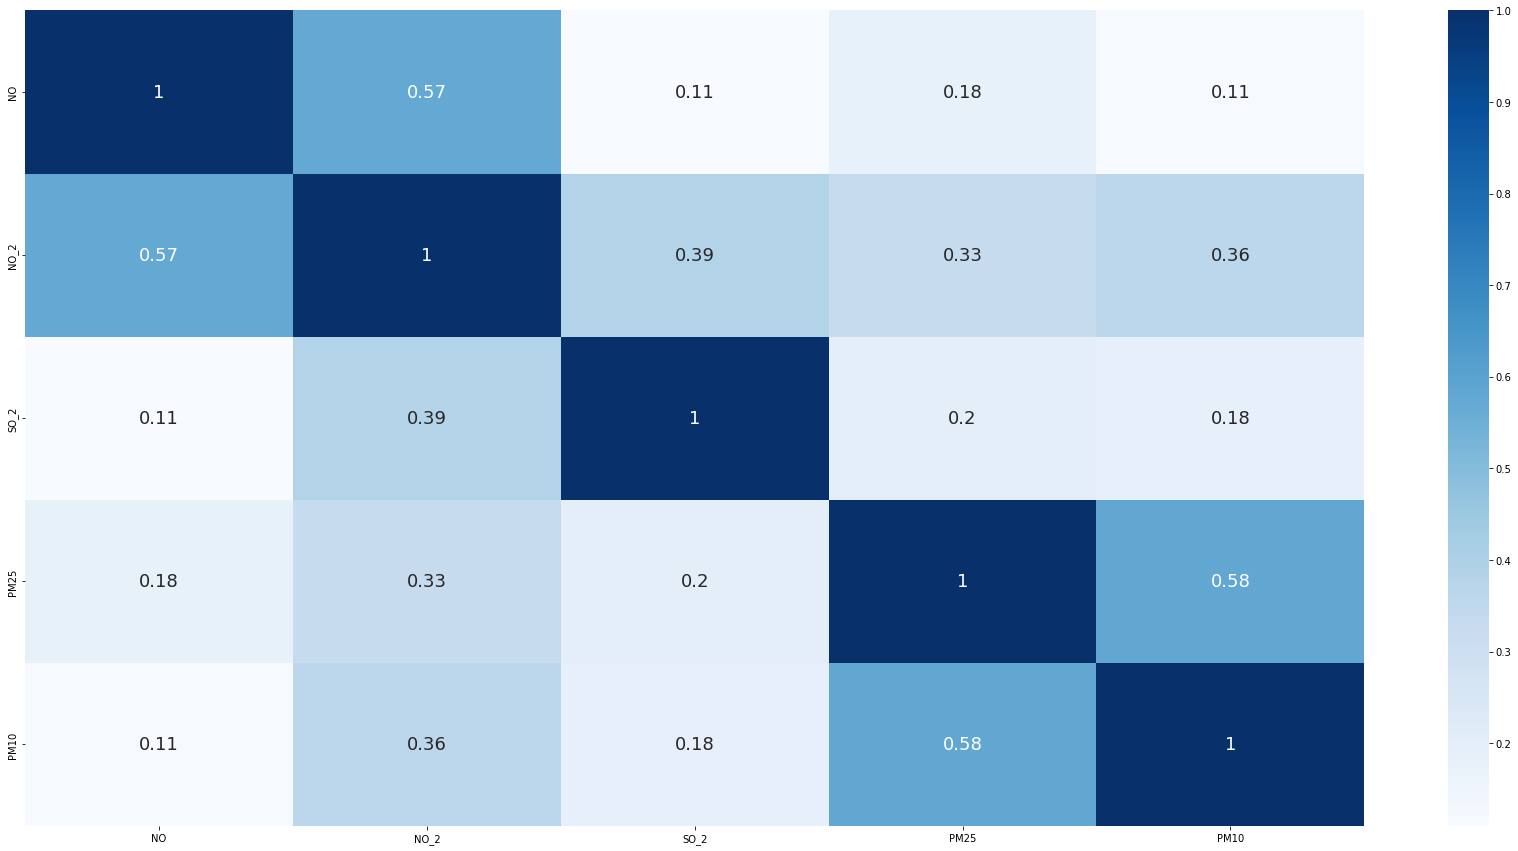

In [12]:
plt.figure(figsize=(30,15))

no = allMadrid['NO']
no2 = allMadrid['NO_2']
so2 = allMadrid['SO_2']
pm25 = allMadrid['PM25']
pm10 = allMadrid['PM10']

result = pd.concat([no,no2,so2,pm25,pm10], axis=1)
ax = sns.heatmap(result.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

CLASSIFICAZIONE BINARIA

In [71]:
# Random state
rs = 59

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 12)
(38, 12)
(150, 1)
(38, 1)


CLASSIFICATORI

In [72]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis()
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

ACCURATEZZA

In [73]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Accuracy: 0.97 	 ---> LogisticRegression 
Accuracy: 1.0 	 ---> DecisionTreeClassifier 
Accuracy: 0.97 	 ---> SVC 
Accuracy: 0.97 	 ---> RandomForestClassifier 
Accuracy: 1.0 	 ---> GradientBoostingClassifier 
Accuracy: 1.0 	 ---> AdaBoostClassifier 
Accuracy: 0.97 	 ---> LinearDiscriminantAnalysis 
